In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv')
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [21]:
df.shape

(2318, 11)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [23]:
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [24]:
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [25]:
print(df.mark.value_counts())
print(df.transmission.value_counts())
print(df.fuel.value_counts())
print(df.hand_drive.value_counts())
print(df.drive.value_counts())

toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: mark, dtype: int64
at     2171
mt      117
cvt      30
Name: transmission, dtype: int64
gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64
rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64
2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64


In [26]:
df.replace({'fuel':{'gasoline':0,'diesel':1,'lpg':2,'hybrid':3,'cng':4}},inplace=True)
df.replace({'transmission':{'at':0,'mt':1,'cvt':2}},inplace=True)
df.replace({'hand_drive':{'rhd':0,'lhd':1,'center':2}},inplace=True)
df.replace({'drive':{'2wd':0,'4wd':1,'awd':2}},inplace=True)


In [27]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,0,0,0,0
1,1,110,nissan,march,2010,53000,1200,0,0,0,0
2,2,165,nissan,lafesta,2005,47690,2000,0,0,0,0
3,3,190,toyota,avensis,2008,130661,1990,0,0,0,0
4,4,190,daihatsu,mira,2006,66300,660,0,0,0,0


In [28]:
X = df.drop(['mark','model','price','id'],axis=1)
Y = df['price']

In [29]:
print(X)

      year  mileage  engine_capacity  transmission  drive  hand_drive  fuel
0     2003    80000             1240             0      0           0     0
1     2010    53000             1200             0      0           0     0
2     2005    47690             2000             0      0           0     0
3     2008   130661             1990             0      0           0     0
4     2006    66300              660             0      0           0     0
...    ...      ...              ...           ...    ...         ...   ...
2313  2009   121000              996             0      0           0     0
2314  2003   101000             3000             0      0           0     0
2315  2005   101000              660             2      0           0     0
2316  2000   170000              660             0      1           0     0
2317  2005    72320             3000             0      0           0     0

[2318 rows x 7 columns]


In [30]:
print(Y)

0         80
1        110
2        165
3        190
4        190
        ... 
2313    1400
2314    1400
2315    1400
2316    1400
2317    1400
Name: price, Length: 2318, dtype: int64


In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [32]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [33]:
training_data_prediction = lr.predict(X_train)


In [34]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print('R squared Error : ',error_score)

R squared Error :  0.06360696295888568


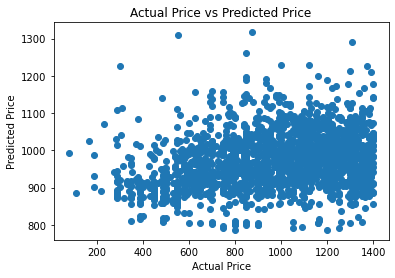

In [35]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [36]:
test_data_prediction = lr.predict(X_test)

In [37]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared Error : ',error_score)

R squared Error :  0.09051942212744446


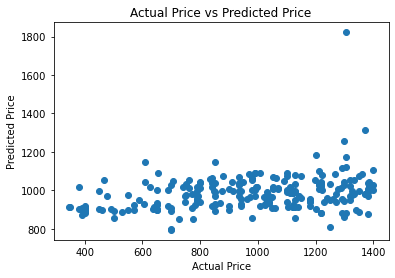

In [38]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [40]:
lass_reg_model = Lasso()

In [41]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [42]:
training_data_prediction = lass_reg_model.predict(X_train)


In [43]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print('R squared Error : ',error_score)

R squared Error :  0.06315691799336243


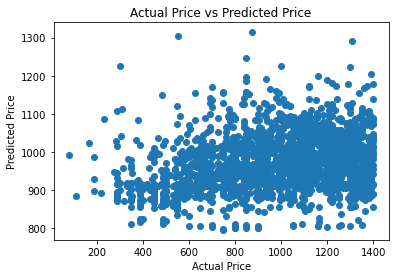

In [44]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [45]:
test_data_prediction = lass_reg_model.predict(X_test)

In [46]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared Error : ',error_score)

R squared Error :  0.08949862260725716


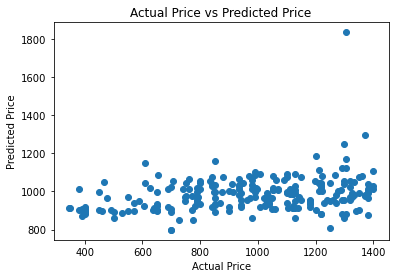

In [47]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()